# In this notebook, you will be able to input specific features, generate rankings and chart them according to the Key Features Score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/chrisjohnson/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# import the csv
neighborhood_glance = pd.read_csv('../3 Data_Files/neighborhood_glance.csv')

In [4]:
#create dictionary of neighborhood names
neighborhood_names = {'Neighborhood_Blmngtn':'Bloomington',
                      'Neighborhood_Blueste': 'Bluestem',
                      'Neighborhood_BrDale': 'Briardale',
                      'Neighborhood_BrkSide': 'Brookside',
                      'Neighborhood_ClearCr': 'Clear Creek',
                      'Neighborhood_CollgCr': 'College Creek',
                      'Neighborhood_Crawfor': 'Crawford',
                      'Neighborhood_Edwards': 'Edwards',
                      'Neighborhood_Gilbert': 'Gilbert',
                      'Neighborhood_Greens': 'Greens',
                      'Neighborhood_GrnHill': 'Green Hills',
                      'Neighborhood_IDOTRR': 'IDOTRR',
                      'Neighborhood_MeadowV': 'Meadow Village',
                      'Neighborhood_Mitchel': 'Mitchell',
                      'Neighborhood_NAmes': 'North Ames',
                      'Neighborhood_NPkVill': 'Northridge',
                      'Neighborhood_NWAmes': 'Northpark Villa',
                      'Neighborhood_NoRidge': 'Northridge Heights',
                      'Neighborhood_NridgHt': 'Northwest Ames',
                      'Neighborhood_OldTown': 'Old Town',
                      'Neighborhood_SWISU': 'SWISU',
                      'Neighborhood_Sawyer': 'Sawyer',
                      'Neighborhood_SawyerW': 'Sawyer West',
                      'Neighborhood_Somerst': 'Somerset',
                      'Neighborhood_StoneBr': 'Stone Brook',
                      'Neighborhood_Timber': 'Timberland',
                      'Neighborhood_Veenker': 'Veenker'}

### Created a function here to create a a new dataframe of neighborhoods, with the columns of Mean Key Feature Score, and Mean Sale Price.

In [5]:
def return_neighborhood(dataframe, categorylist, feature1, feature2, feature3, scale):
    # create new column by making a feature score
    dataframe['Key Features'] = (dataframe[feature1] * dataframe[feature2] *(dataframe[feature3] > 2))/scale
    neighborhood_scores = {}    # create an empty dictionary
    for column in dataframe.columns:    #cycle through the columns in the dataframe
        for key, neighborhood in categorylist.items():   # pull keys and values from neighborhood dictionary 
            if column in categorylist[key]:    # is the column in the values of the dictionary
                # Create mean key feature score and mean sale price for each neighborhood and add to dictionary
                neighborhood_key_features =  neighborhood_glance[(neighborhood_glance[column] == 1)]['Key Features'].mean()
                neighborhood_sale_price = neighborhood_glance[(neighborhood_glance[column]==1)]['SalePrice'].mean()
                neighborhood_scores[column] = (neighborhood_key_features, neighborhood_sale_price)
    # create new dataframe
    neighborhood_score = pd.DataFrame.from_dict(neighborhood_scores, orient='index')
    neighborhood_score.rename(columns={0: 'Key Features', 1: 'SalePrice'}, inplace=True)
    return neighborhood_score.sort_values('Key Features', ascending=False)


### Created a function here to create a chart of the neighborhoods by Key Feature Score.

In [6]:
def chart_feature_score(dataframe1, item):
    plt.figure(figsize=(30,15))
    plt.bar(dataframe1.index, dataframe1[item])
    plt.xticks(rotation=90, fontsize=25)
    plt.yticks(fontsize=25)
    plt.title(f'{item}', fontsize=50)
    plt.xlabel('Neighborhood', fontsize=35)
    plt.ylabel('Key Feature Score', fontsize=35)
    ;

In [7]:
client1 = return_neighborhood(neighborhood_glance, neighborhood_names,'Gr Liv Area', 'Lot Area', 'Full Bath', 1)
client1

,Key Features,SalePrice
Stone Brook,7.155211e+06,316613.638889
Clear Creek,2.529117e+06,205328.727273
Northridge Heights,2.155676e+06,314470.595745
Veenker,1.700242e+06,245356.250000
Northwest Ames,1.545779e+06,322831.352459
Northpark Villa,1.525306e+06,194619.022989
Mitchell,1.185654e+06,168121.604938
Crawford,1.157183e+06,205901.211268
Sawyer West,1.092429e+06,187760.160920
Edwards,9.165752e+05,128800.114286


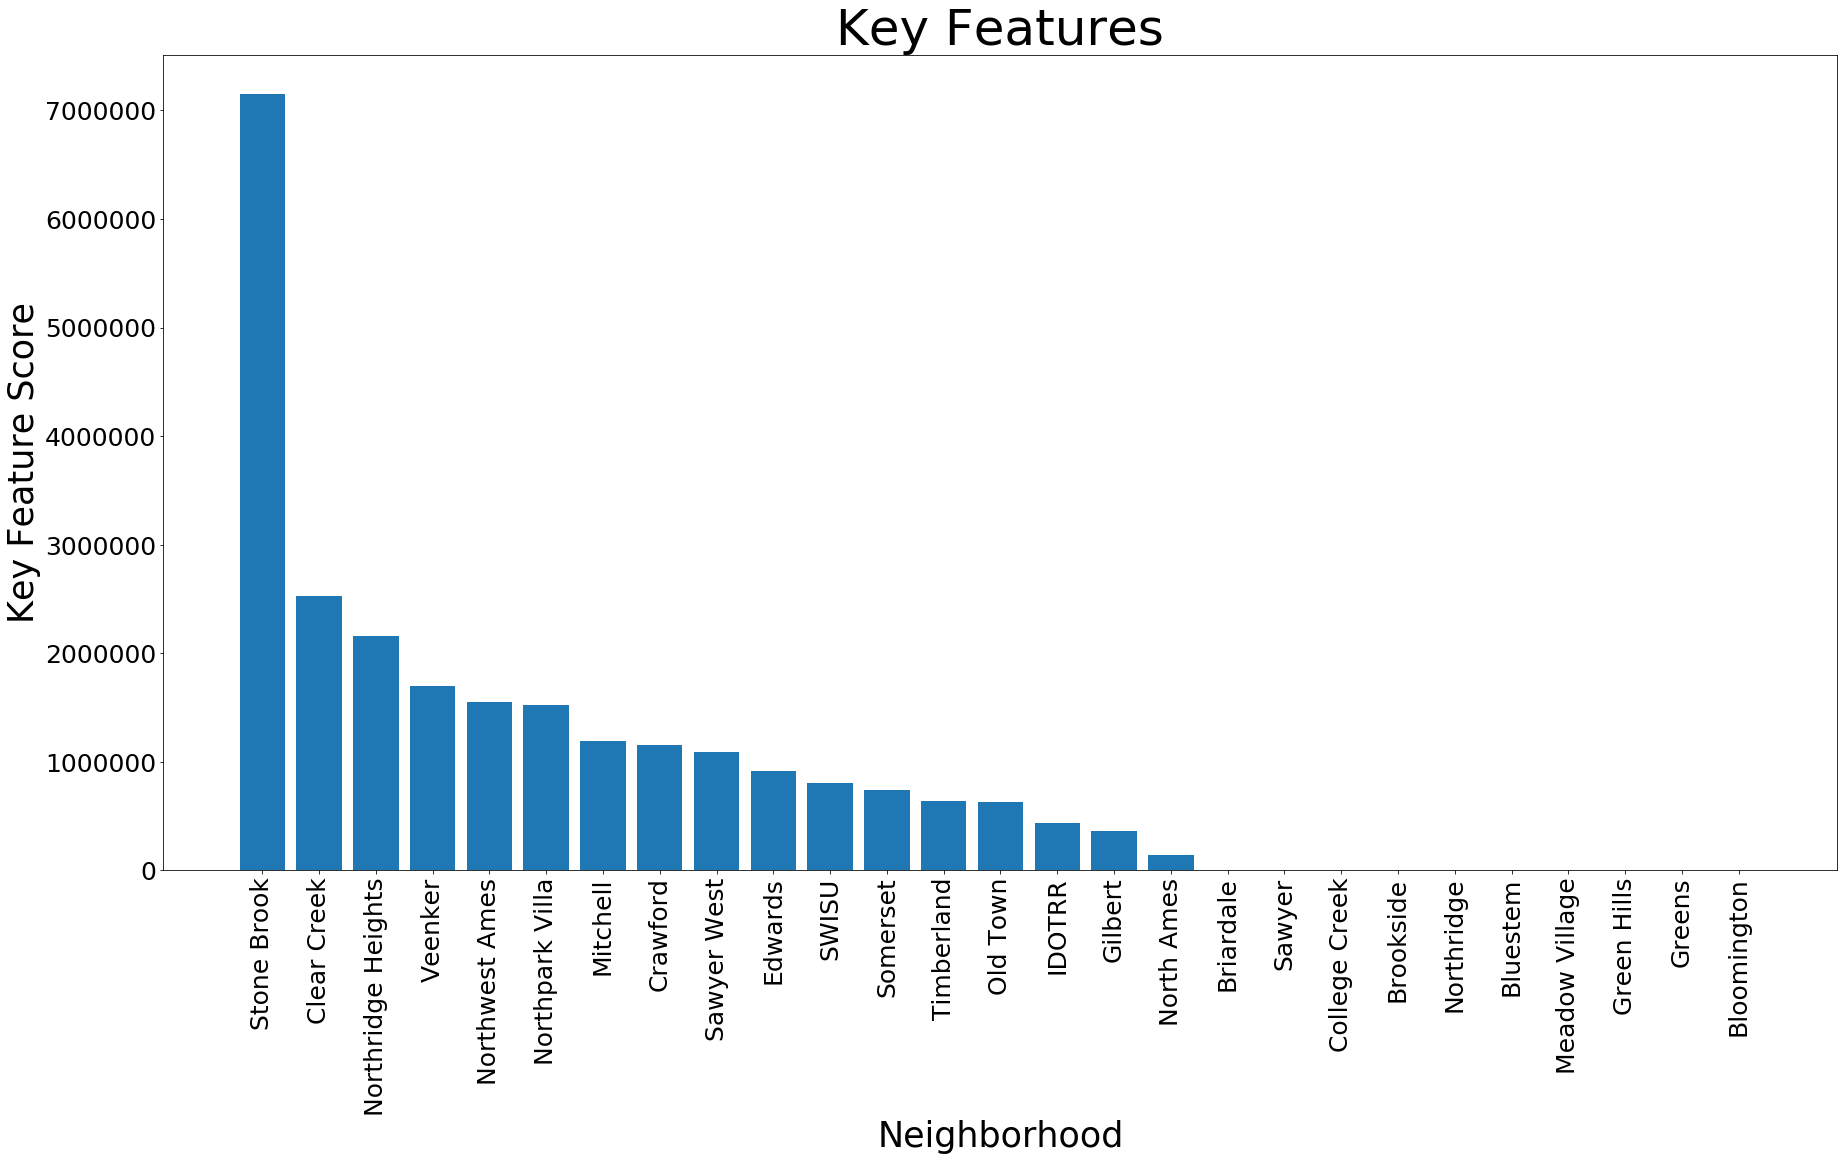

In [8]:
chart_feature_score(client1, 'Key Features')

In [9]:
client2 = return_neighborhood(neighborhood_glance, neighborhood_names, 'Gr Liv Area', 'Lot Area', 'Bedroom AbvGr', 1)
client2

,Key Features,SalePrice
Northridge Heights,2.668571e+07,314470.595745
Northpark Villa,1.930234e+07,194619.022989
Clear Creek,1.834433e+07,205328.727273
Veenker,1.708236e+07,245356.250000
Crawford,1.683079e+07,205901.211268
Gilbert,1.633450e+07,190021.868421
Northwest Ames,1.627525e+07,322831.352459
Timberland,1.433879e+07,242602.195652
College Creek,1.409566e+07,202497.216667
Sawyer West,1.397316e+07,187760.160920


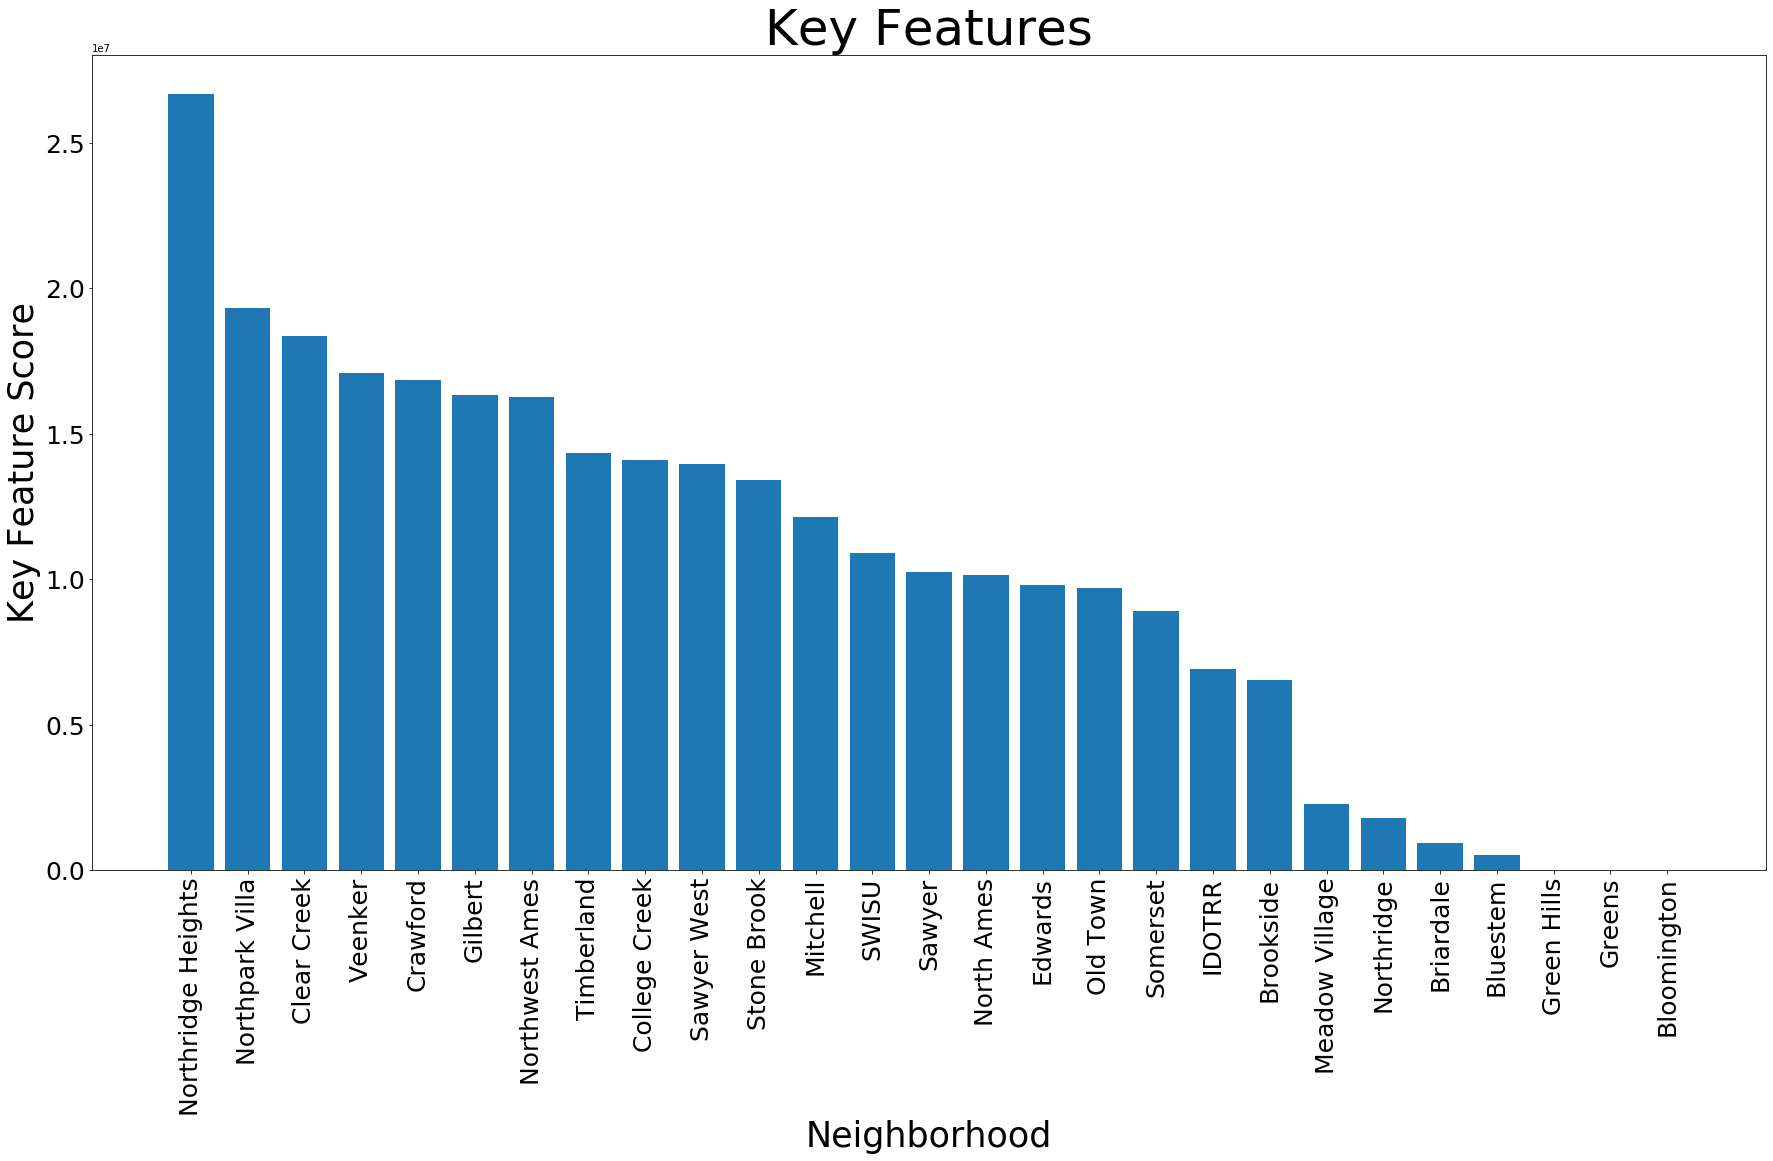

In [10]:
chart_feature_score(client2, 'Key Features')